'data.frame':	16065 obs. of  6 variables:
 $ disease        : Factor w/ 7 levels "Hepatitis A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state          : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year           : num  1966 1967 1968 1969 1970 ...
 $ weeks_reporting: num  50 49 52 49 51 51 45 45 45 46 ...
 $ count          : num  321 291 314 380 413 378 342 467 244 286 ...
 $ population     : num  3345787 3364130 3386068 3412450 3444165 ...


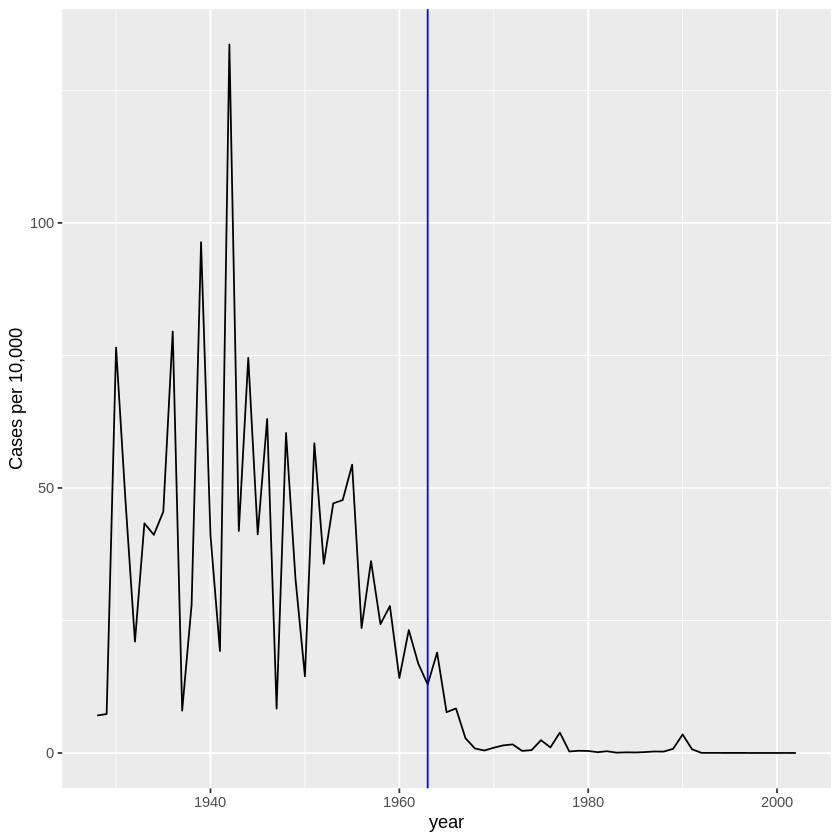

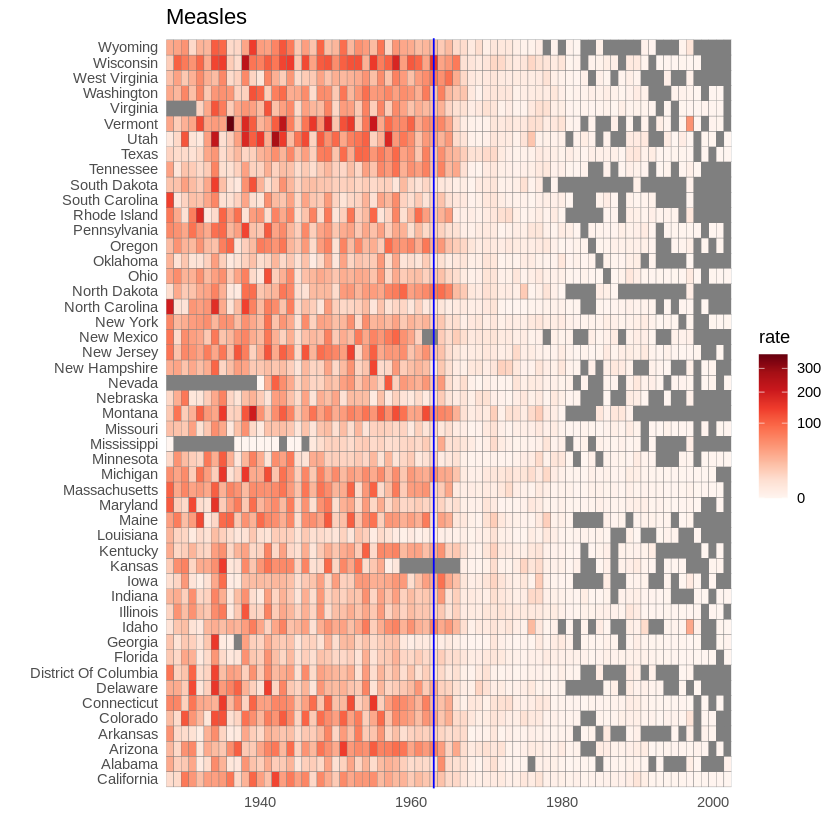

In [2]:
# import data and inspect
library(tidyverse)
library(dslabs)
data(us_contagious_diseases)
str(us_contagious_diseases)

# assign dat to the per 10,000 rate of measles, removing Alaska and Hawaii and adjusting for weeks reporting
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
    filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
    mutate(rate = count / population * 10000 * 52/weeks_reporting) %>%
    mutate(state = reorder(state, rate))

# plot disease rates per year in California
dat %>% filter(state == "California" & !is.na(rate)) %>%
    ggplot(aes(year, rate)) +
    geom_line() +
    ylab("Cases per 10,000") +
    geom_vline(xintercept=1963, col = "blue")

# tile plot of disease rate by state and year
dat %>% ggplot(aes(year, state, fill=rate)) +
    geom_tile(color = "grey50") +
    scale_x_continuous(expand = c(0,0)) +
    scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "Reds"), trans = "sqrt") +
    geom_vline(xintercept = 1963, col = "blue") +
    theme_minimal() + theme(panel.grid = element_blank()) +
    ggtitle(the_disease) +
    ylab("") +
    xlab("")

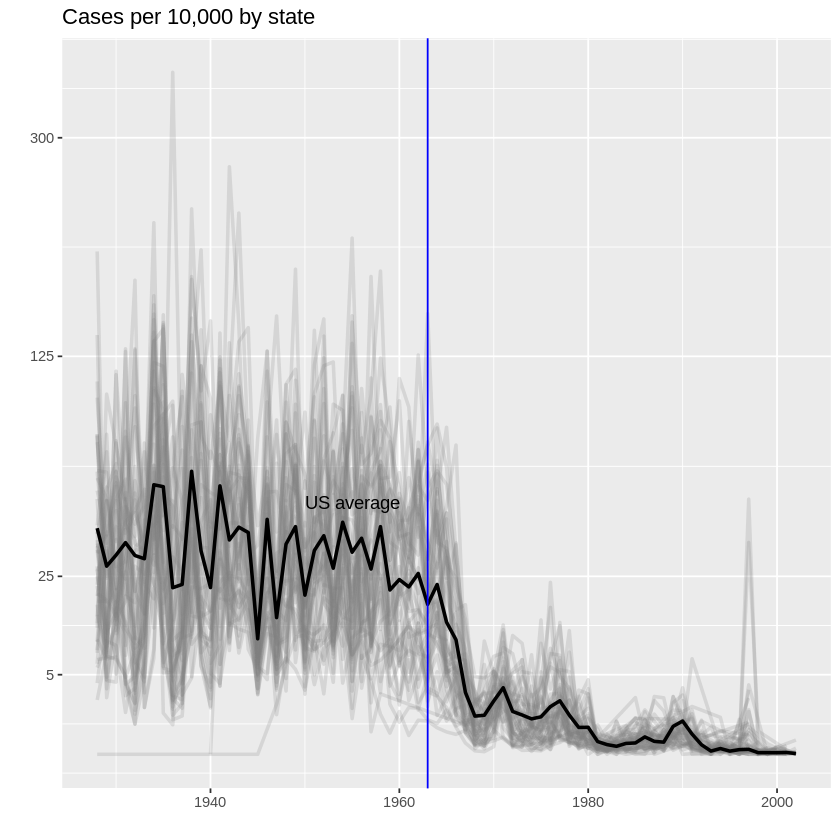

In [3]:
# compute US average measles rate by year
avg <- us_contagious_diseases %>%
    filter(disease == the_disease) %>% group_by(year) %>%
    summarize(us_rate = sum(count, na.rm = TRUE)/sum(population, na.rm = TRUE)*10000)

# make line plot of measles rate by year by state
dat %>%
    filter(!is.na(rate)) %>%
    ggplot() +
    geom_line(aes(year, rate, group = state), color = "grey50", 
        show.legend = FALSE, alpha = 0.2, size = 1) +
    geom_line(mapping = aes(year, us_rate), data = avg, size = 1, col = "black") +
    scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) +
    ggtitle("Cases per 10,000 by state") +
    xlab("") +
    ylab("") +
    geom_text(data = data.frame(x = 1955, y = 50),
        mapping = aes(x, y, label = "US average"), color = "black") +
    geom_vline(xintercept = 1963, col = "blue")